In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

In [4]:
df = pd.read_csv('insurance_claims.csv')
print(f'shape of dataset : {df.shape}')
df.head()

shape of dataset : (1000, 40)


months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    2015-01-25  Single Vehicle Collision   Side Collision      Major Damage   
1    2015-01-21             Vehicle Theft                ?      Minor Damage   
2    2015-02-22   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    2015-01-10  Single Vehicle Collision  Front Collision      Major Damage   
4    2015-02-17             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [5]:
df.replace('?', np.nan, inplace = True) # replacing '?' with 'nan' value

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
df.describe().transpose()

count          mean           std         min  \
months_as_customer           1000.0  2.039540e+02  1.151132e+02        0.00   
age                          1000.0  3.894800e+01  9.140287e+00       19.00   
policy_number                1000.0  5.462386e+05  2.570630e+05   100804.00   
policy_deductable            1000.0  1.136000e+03  6.118647e+02      500.00   
policy_annual_premium        1000.0  1.256406e+03  2.441674e+02      433.33   
umbrella_limit               1000.0  1.101000e+06  2.297407e+06 -1000000.00   
insured_zip                  1000.0  5.012145e+05  7.170161e+04   430104.00   
capital-gains                1000.0  2.512610e+04  2.787219e+04        0.00   
capital-loss                 1000.0 -2.679370e+04  2.810410e+04  -111100.00   
incident_hour_of_the_day     1000.0  1.164400e+01  6.951373e+00        0.00   
number_of_vehicles_involved  1000.0  1.839000e+00  1.018880e+00        1.00   
bodily_injuries              1000.0  9.920000e-01  8.201272e-01        0.00   
witnesses                    1000.0  1.487000e+00  1.111335e+00        0.00   
total_claim_amount           1000.0  5.276194e+04  2.640153e+04      100.00   
injury_claim                 1000.0  7.433420e+03  4.880952e+03        0.00   
property_claim               1000.0  7.399570e+03  4.824726e+03        0.00   
vehicle_claim                1000.0  3.792895e+04  1.888625e+04       70.00   
auto_year                    1000.0  2.005103e+03  6.015861e+00     1995.00   
_c39                            0.0           NaN           NaN         NaN   

                                     25%       50%         75%          max  
months_as_customer              115.7500     199.5     276.250       479.00  
age                              32.0000      38.0      44.000        64.00  
policy_number                335980.2500  533135.0  759099.750    999435.00  
policy_deductable               500.0000    1000.0    2000.000      2000.00  
policy_annual_premium          1089.6075    1257.2    1415.695      2047.59  
umbrella_limit                    0.0000       0.0       0.000  10000000.00  
insured_zip                  448404.5000  466445.5  603251.000    620962.00  
capital-gains                     0.0000       0.0   51025.000    100500.00  
capital-loss                 -51500.0000  -23250.0       0.000         0.00  
incident_hour_of_the_day          6.0000      12.0      17.000        23.00  
number_of_vehicles_involved       1.0000       1.0       3.000         4.00  
bodily_injuries                   0.0000       1.0       2.000         2.00  
witnesses                         1.0000       1.0       2.000         3.00  
total_claim_amount            41812.5000   58055.0   70592.500    114920.00  
injury_claim                   4295.0000    6775.0   11305.000     21450.00  
property_claim                 4445.0000    6750.0   10885.000     23670.00  
vehicle_claim                 30292.5000   42100.0   50822.500     79560.00  
auto_year                      2000.0000    2005.0    2010.000      2015.00  
_c39                                 NaN       NaN         NaN          NaN

In [7]:
# missing values
df.isna().sum() / len(df) * 100

months_as_customer               0.0
age                              0.0
policy_number                    0.0
policy_bind_date                 0.0
policy_state                     0.0
policy_csl                       0.0
policy_deductable                0.0
policy_annual_premium            0.0
umbrella_limit                   0.0
insured_zip                      0.0
insured_sex                      0.0
insured_education_level          0.0
insured_occupation               0.0
insured_hobbies                  0.0
insured_relationship             0.0
capital-gains                    0.0
capital-loss                     0.0
incident_date                    0.0
incident_type                    0.0
collision_type                  17.8
incident_severity                0.0
authorities_contacted            0.0
incident_state                   0.0
incident_city                    0.0
incident_location                0.0
incident_hour_of_the_day         0.0
number_of_vehicles_involved      0.0
p


# Missing Value Adjustment

In [8]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [9]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

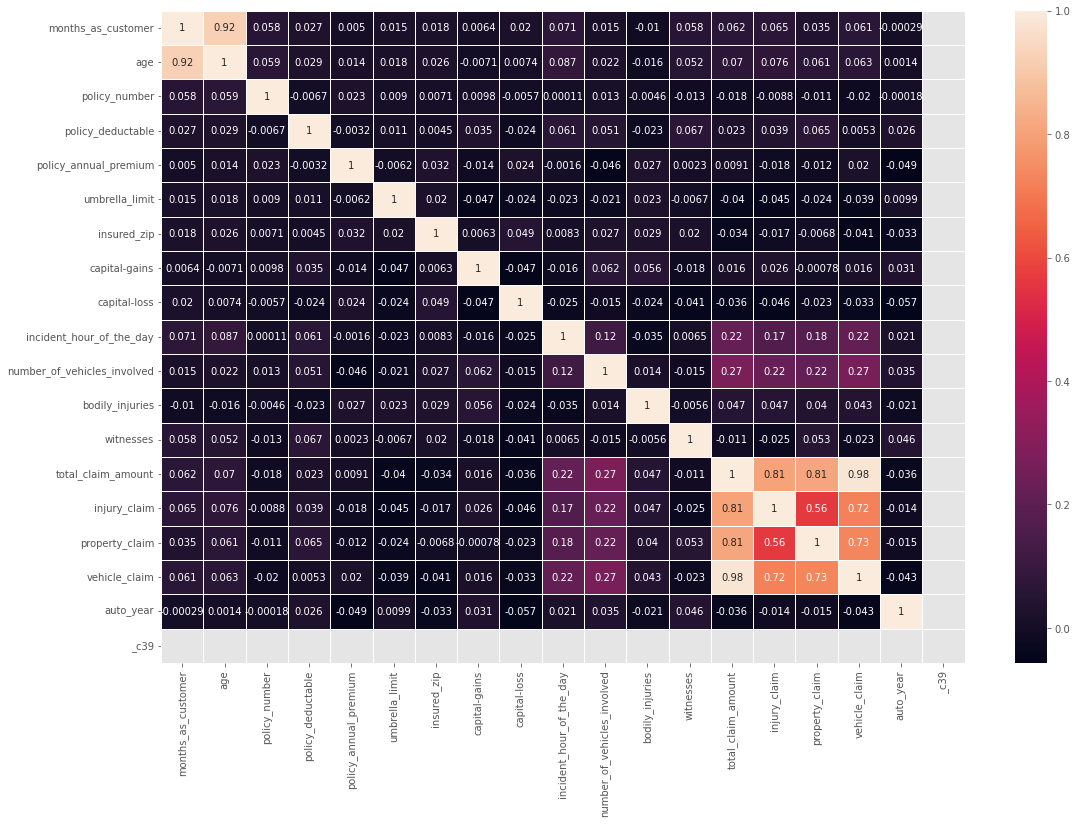

In [10]:
# heatmap

plt.figure(figsize = (18, 12))

corr = df.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [11]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [12]:
# dropping columns which are not necessary for prediction

to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
    'insured_hobbies','auto_make','auto_model','auto_year', '_c39']

df.drop(to_drop, inplace = True, axis = 1)

In [13]:
print(f'shape of dataset: {df.shape}')
df.head()


shape of dataset: (1000, 29)


months_as_customer  age policy_csl  policy_deductable  \
0                 328   48    250/500               1000   
1                 228   42    250/500               2000   
2                 134   29    100/300               2000   
3                 256   41    250/500               2000   
4                 228   44   500/1000               1000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   
1                1197.22         5000000        MALE                      MD   
2                1413.14         5000000      FEMALE                     PhD   
3                1415.74         6000000      FEMALE                     PhD   
4                1583.91         6000000        MALE               Associate   

  insured_occupation insured_relationship  capital-gains  capital-loss  \
0       craft-repair              husband          53300             0   
1  machine-op-inspct       other-relative              0             0   
2              sales            own-child          35100             0   
3       armed-forces            unmarried          48900        -62400   
4              sales            unmarried          66000        -46000   

              incident_type   collision_type incident_severity  \
0  Single Vehicle Collision   Side Collision      Major Damage   
1             Vehicle Theft   Rear Collision      Minor Damage   
2   Multi-vehicle Collision   Rear Collision      Minor Damage   
3  Single Vehicle Collision  Front Collision      Major Damage   
4             Vehicle Theft   Rear Collision      Minor Damage   

  authorities_contacted incident_state incident_city  \
0                Police             SC      Columbus   
1                Police             VA     Riverwood   
2                Police             NY      Columbus   
3                Police             OH     Arlington   
4                  None             NY     Arlington   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1              NO   
2                         7                            3              NO   
3                         5                            1              NO   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                      NO                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim fraud_reported  
0          6510           13020          52080              Y  
1           780             780           3510              Y  
2          7700            3850          23100              N  
3          6340            6340          50720              Y  
4          1300             650           4550              N

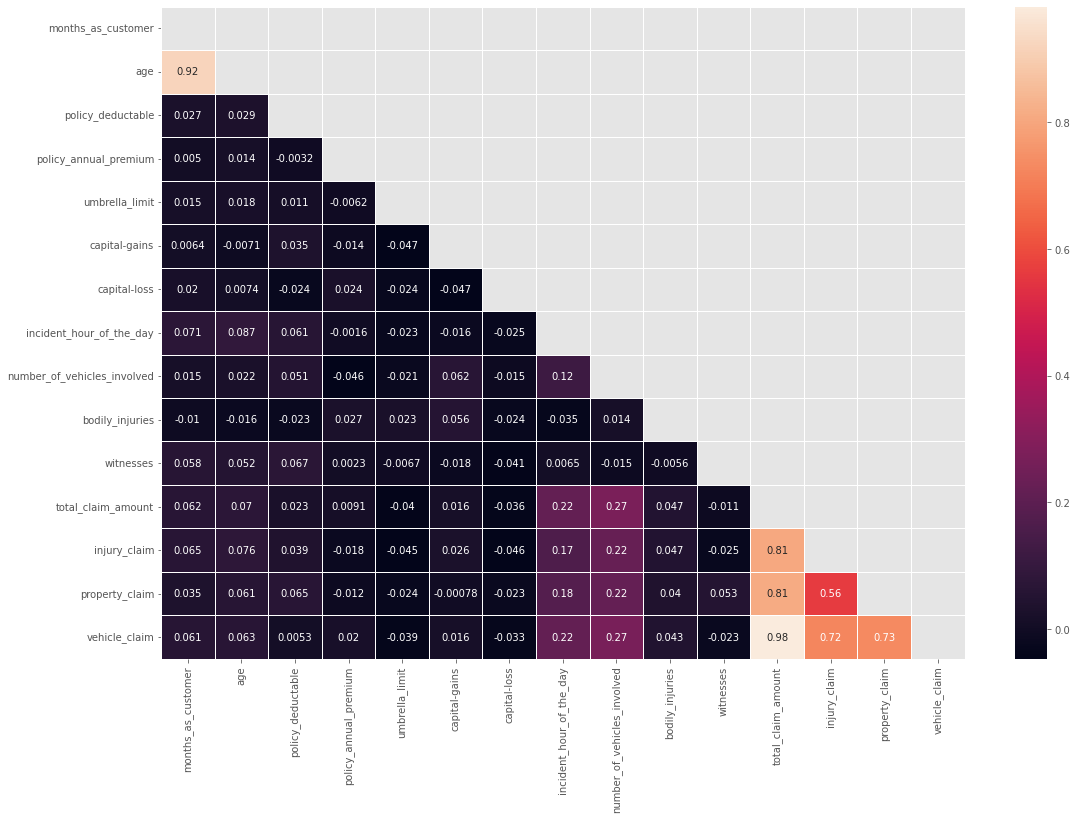

In [14]:
# checking for multicollinearity

plt.figure(figsize = (18, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

From the above plot, we can see that there is high correlation between "age and months_as_customer".We will drop the "Age" column. Also there is high correlation between "total_clam_amount, injury_claim, property_claim, vehicle_claim" as total claim is the sum of all others. So we will drop the total claim column.

In [15]:
df.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)
df.head()

months_as_customer policy_csl  policy_deductable  policy_annual_premium  \
0                 328    250/500               1000                1406.91   
1                 228    250/500               2000                1197.22   
2                 134    100/300               2000                1413.14   
3                 256    250/500               2000                1415.74   
4                 228   500/1000               1000                1583.91   

   umbrella_limit insured_sex insured_education_level insured_occupation  \
0               0        MALE                      MD       craft-repair   
1         5000000        MALE                      MD  machine-op-inspct   
2         5000000      FEMALE                     PhD              sales   
3         6000000      FEMALE                     PhD       armed-forces   
4         6000000        MALE               Associate              sales   

  insured_relationship  capital-gains  capital-loss             incident_type  \
0              husband          53300             0  Single Vehicle Collision   
1       other-relative              0             0             Vehicle Theft   
2            own-child          35100             0   Multi-vehicle Collision   
3            unmarried          48900        -62400  Single Vehicle Collision   
4            unmarried          66000        -46000             Vehicle Theft   

    collision_type incident_severity authorities_contacted incident_state  \
0   Side Collision      Major Damage                Police             SC   
1   Rear Collision      Minor Damage                Police             VA   
2   Rear Collision      Minor Damage                Police             NY   
3  Front Collision      Major Damage                Police             OH   
4   Rear Collision      Minor Damage                  None             NY   

  incident_city  incident_hour_of_the_day  number_of_vehicles_involved  \
0      Columbus                         5                            1   
1     Riverwood                         8                            1   
2      Columbus                         7                            3   
3     Arlington                         5                            1   
4     Arlington                        20                            1   

  property_damage  bodily_injuries  witnesses police_report_available  \
0             YES                1          2                     YES   
1              NO                0          0                      NO   
2              NO                2          3                      NO   
3              NO                1          2                      NO   
4              NO                0          1                      NO   

   injury_claim  property_claim  vehicle_claim fraud_reported  
0          6510           13020          52080              Y  
1           780             780           3510              Y  
2          7700            3850          23100              N  
3          6340            6340          50720              Y  
4          1300             650           4550              N

In [16]:
# separating the feature and target columns

X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

In [17]:
y = y.map({'Y': 1, 'N': 0})    # Use map() to replace 'Y' with 1 and 'N' with 0

In [18]:
# Split columns into numerical and categorical
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

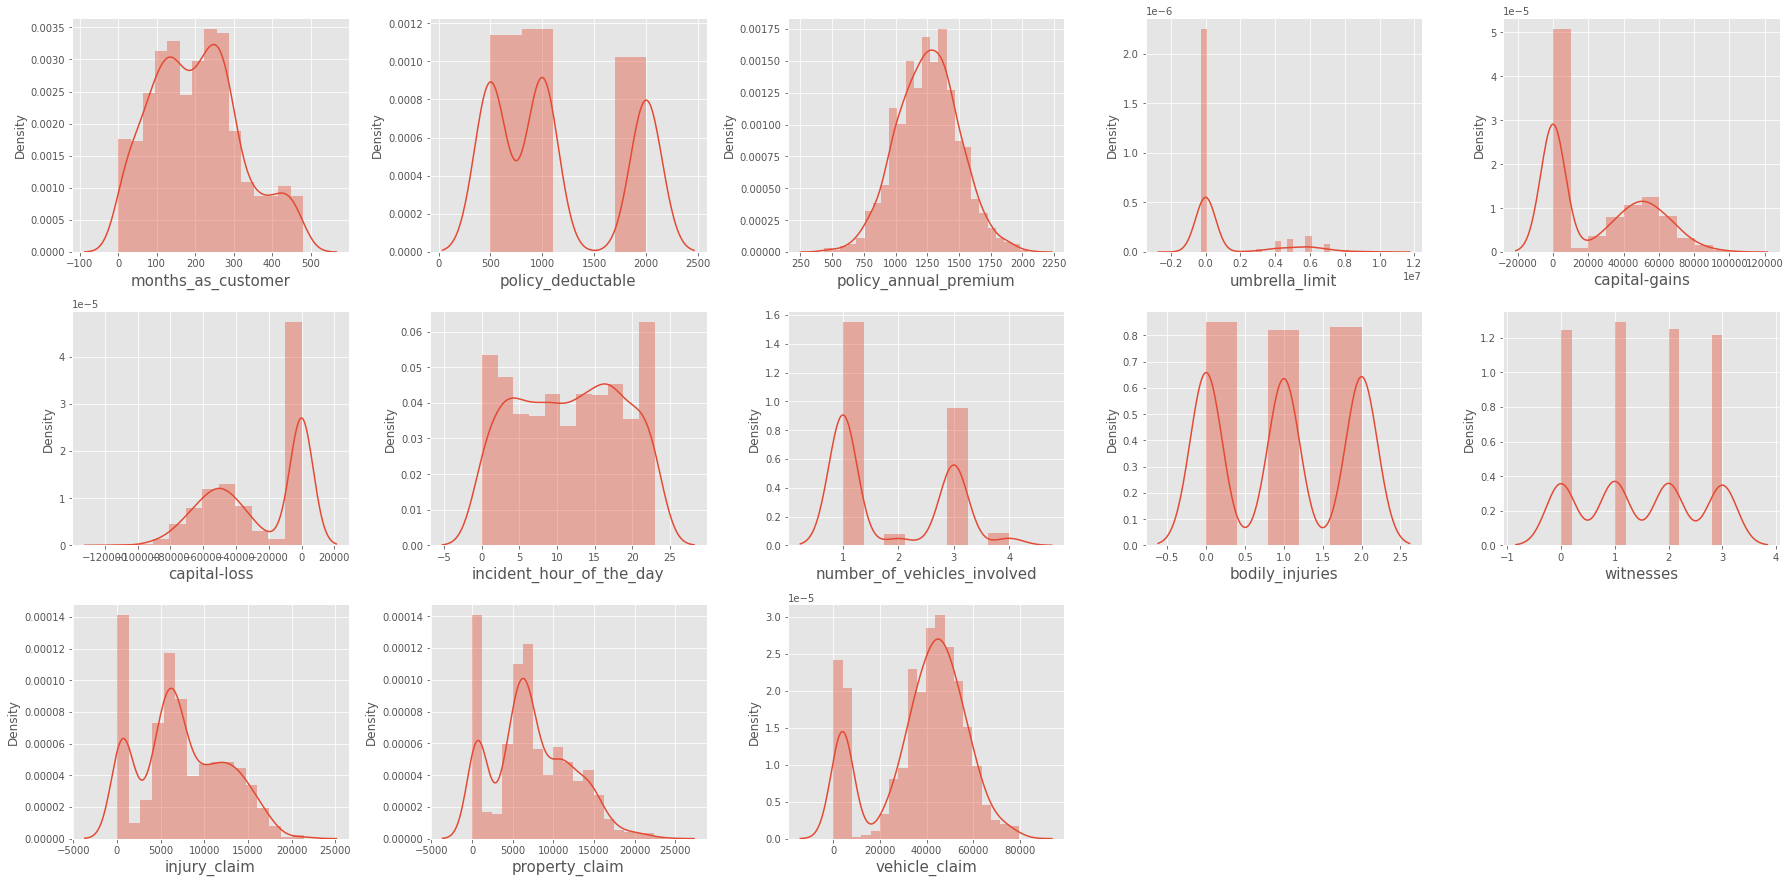

In [19]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in num_cols:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

# Outliers Detection

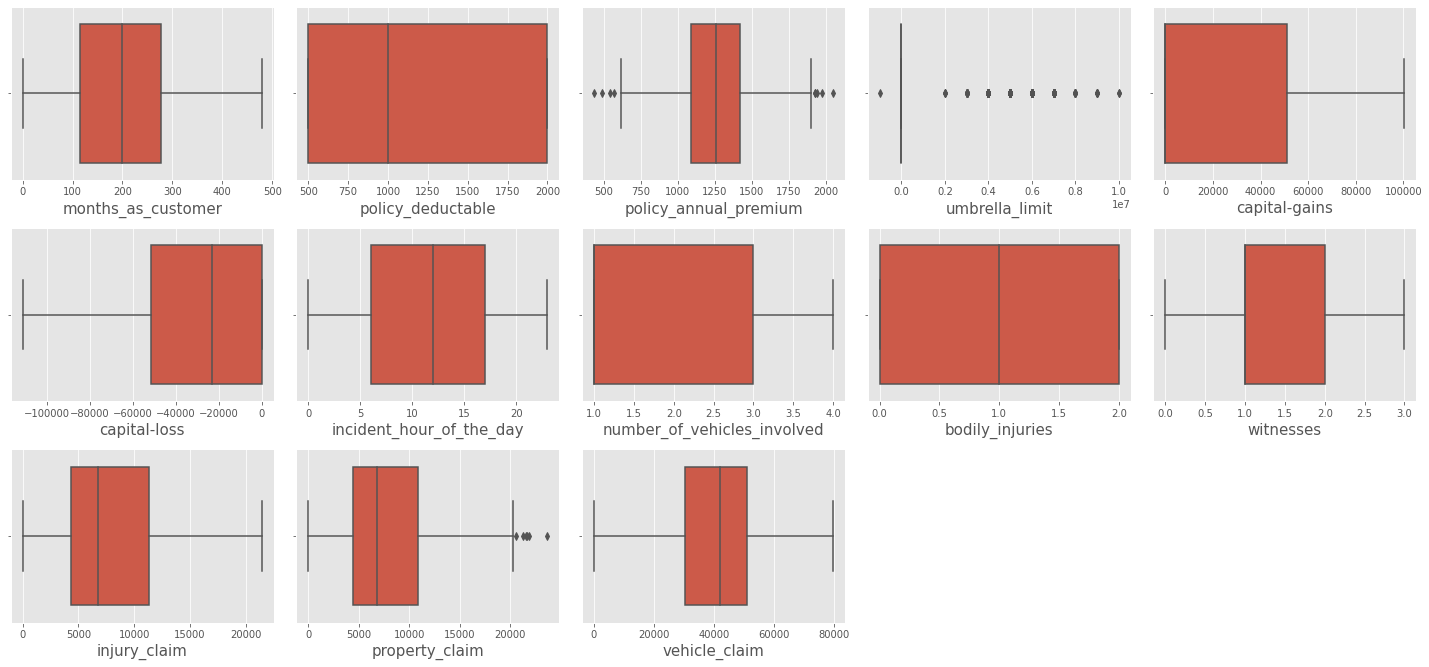

In [20]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in num_cols:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

Outliers are present in some numerical columns we will scale numerical columns later



# Data Pre- Processing

In [21]:
from sklearn.preprocessing import StandardScaler

def scale_and_encode(df):
    # Split columns into numerical and categorical
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()
    
    # Standardize numerical columns
    scaler = StandardScaler()
    df[num_cols] = scaler.fit_transform(df[num_cols])
    
    # One-hot encode categorical columns
    df = pd.get_dummies(df, columns=cat_cols,drop_first = True)
    
    return df

In [22]:
X = scale_and_encode(X)
X.head()

months_as_customer  policy_deductable  policy_annual_premium  \
0            1.078140          -0.222383               0.616705   
1            0.208995           1.412784              -0.242521   
2           -0.608002           1.412784               0.642233   
3            0.452355           1.412784               0.652886   
4            0.208995          -0.222383               1.341980   

   umbrella_limit  capital-gains  capital-loss  incident_hour_of_the_day  \
0       -0.479476       1.011331      0.953851                 -0.956261   
1        1.697980      -0.901927      0.953851                 -0.524475   
2        1.697980       0.358023      0.953851                 -0.668404   
3        2.133471       0.853388     -1.267577                 -0.956261   
4        2.133471       1.467210     -0.683741                  1.202666   

   number_of_vehicles_involved  bodily_injuries  witnesses  injury_claim  \
0                    -0.823865         0.009759   0.461838     -0.189283   
1                    -0.823865        -1.210174  -1.338700     -1.363822   
2                     1.140056         1.229693   1.362107      0.054644   
3                    -0.823865         0.009759   0.461838     -0.224130   
4                    -0.823865        -1.210174  -0.438431     -1.257232   

   property_claim  vehicle_claim  policy_csl_250/500  policy_csl_500/1000  \
0        1.165505       0.749653                   1                    0   
1       -1.372696      -1.823346                   1                    0   
2       -0.736072      -0.785565                   0                    0   
3       -0.219722       0.677607                   1                    0   
4       -1.399654      -1.768252                   0                    1   

   insured_sex_MALE  insured_education_level_College  \
0                 1                                0   
1                 1                                0   
2                 0                                0   
3                 0                                0   
4                 1                                0   

   insured_education_level_High School  insured_education_level_JD  \
0                                    0                           0   
1                                    0                           0   
2                                    0                           0   
3                                    0                           0   
4                                    0                           0   

   insured_education_level_MD  insured_education_level_Masters  \
0                           1                                0   
1                           1                                0   
2                           0                                0   
3                           0                                0   
4                           0                                0   

   insured_education_level_PhD  insured_occupation_armed-forces  \
0                            0                                0   
1                            0                                0   
2                            1                                0   
3                            1                                1   
4                            0                                0   

   insured_occupation_craft-repair  insured_occupation_exec-managerial  \
0                                1                                   0   
1                                0                                   0   
2                                0                                   0   
3                                0                                   0   
4                                0                                   0   

   insured_occupation_farming-fishing  insured_occupation_handlers-cleaners  \
0                                   0                                     0   
1                                   0                         

In [23]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42,stratify=y)

# Modeling

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier

from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

In [29]:
models = {'LogisticRegression': LogisticRegression(max_iter=10000),
          'KNeighborsClassifier': KNeighborsClassifier(),
          'SVC': SVC(),
          'GaussianNB':GaussianNB(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'RandomForestClassifier': RandomForestClassifier(),
          'GradientBoostingClassifier': GradientBoostingClassifier(),
          'AdaBoostClassifier': AdaBoostClassifier(),
          'XGBClassifier': XGBClassifier()}

In [30]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(0)
    
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)

    model_scores = pd.DataFrame(model_scores,index=['Score']).transpose()
    model_scores = model_scores.sort_values('Score')
    
    
    return model_scores

In [31]:
model_scores = fit_and_score(models,X_train,X_test,y_train,y_test)

In [32]:
cm = sns.color_palette('PuBuGn',as_cmap=True)
score = model_scores.style.background_gradient(cmap=cm)
score

In [33]:
# Convert the styled dataframe to a regular dataframe
df_score = pd.DataFrame(score.data)
df_score

Score
GaussianNB                  0.600
DecisionTreeClassifier      0.685
KNeighborsClassifier        0.740
RandomForestClassifier      0.740
SVC                         0.745
GradientBoostingClassifier  0.765
AdaBoostClassifier          0.775
XGBClassifier               0.780
LogisticRegression          0.805

In [34]:
px.bar(data_frame = df_score, x = 'Score', y = df_score.index, color = 'Score', template = 'plotly_dark', 
       title = 'Models Comparison')